In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import os

def savitzky_golay_coeff(y, window_size, order, deriv=0, rate=1):
    """"get Savitzky-Golay coefficients
    
    I think this fn came from chatgpt?
    """
    # Ensure window size is odd and greater than the polynomial order
    window_size = np.abs(int(window_size))
    order = np.abs(int(order))
    if window_size % 2 != 1 or window_size < 1:
        raise ValueError("window_size must be a positive odd number")
    if window_size < order + 2:
        raise ValueError("window_size is too small for the polynomial order")

    # Precompute coefficients
    half_window = (window_size - 1) // 2
    b = np.mat([[k**i for i in range(order + 1)] for k in range(-half_window, half_window + 1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)
    return m

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    m = savitzky_golay_coeff(y, window_size, order, deriv=deriv, rate=rate)
    # Pad the signal at the extremes with values taken from the signal itself
    firstvals = y[0] - np.abs(y[1:half_window+1][::-1] - y[0])
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))

    return np.convolve(m[::-1], y, mode='valid')



In [2]:
# Sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.random(100) * 0.2

# Apply Savitzky-Golay filter
window_size = 11  # length of the filter window (must be odd)
polyorder = 2     # order of the polynomial used to fit the samples
y_smooth = savitzky_golay(y, window_size, polyorder)

# Plot the results
plt.plot(x, y, label='Noisy signal')
plt.plot(x, y_smooth, label='Smoothed signal', color='red')
plt.legend()
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_48892\3736273394.py:23: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)


NameError: name 'half_window' is not defined

C:\Users\Andrew\AppData\Local\Temp\ipykernel_17504\1351388567.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)


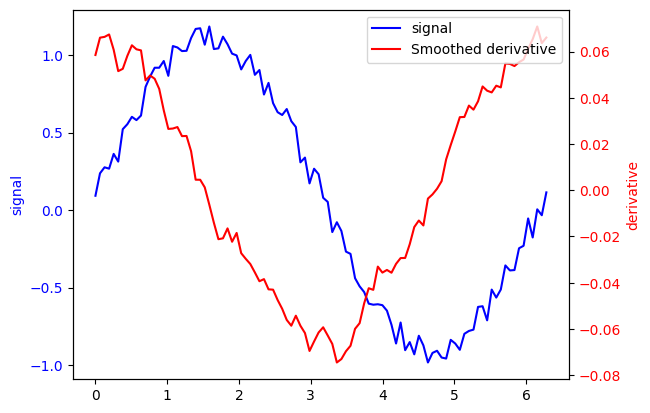

In [9]:
# Sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.random(100) * 0.2

# Apply Savitzky-Golay filter
window_size = 11  # length of the filter window (must be odd)
polyorder = 2     # order of the polynomial used to fit the samples
d1_smooth = savitzky_golay(y, window_size, polyorder, deriv=1)

# Create the plot
fig, ax1 = plt.subplots()

# Plot the first line
ax1.plot(x, y, label='signal', color='blue')
ax1.set_ylabel('signal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, d1_smooth, label='Smoothed derivative', color='red')
ax2.set_ylabel('derivative', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

# # Plot the results
# plt.plot(x, y, label='Noisy signal')
# plt.plot(x, y_smooth, label='Smoothed signal', color='red')
# plt.legend()
# plt.show()

In [ ]:
window_len = 13
polyorder=2
use='conv' # 'dot' or 'conv'
filter_d0 = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=0,
    pos=window_len-1,
    use=use
)
filter_d1 = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=1,
    pos=window_len-1,
    use=use
)

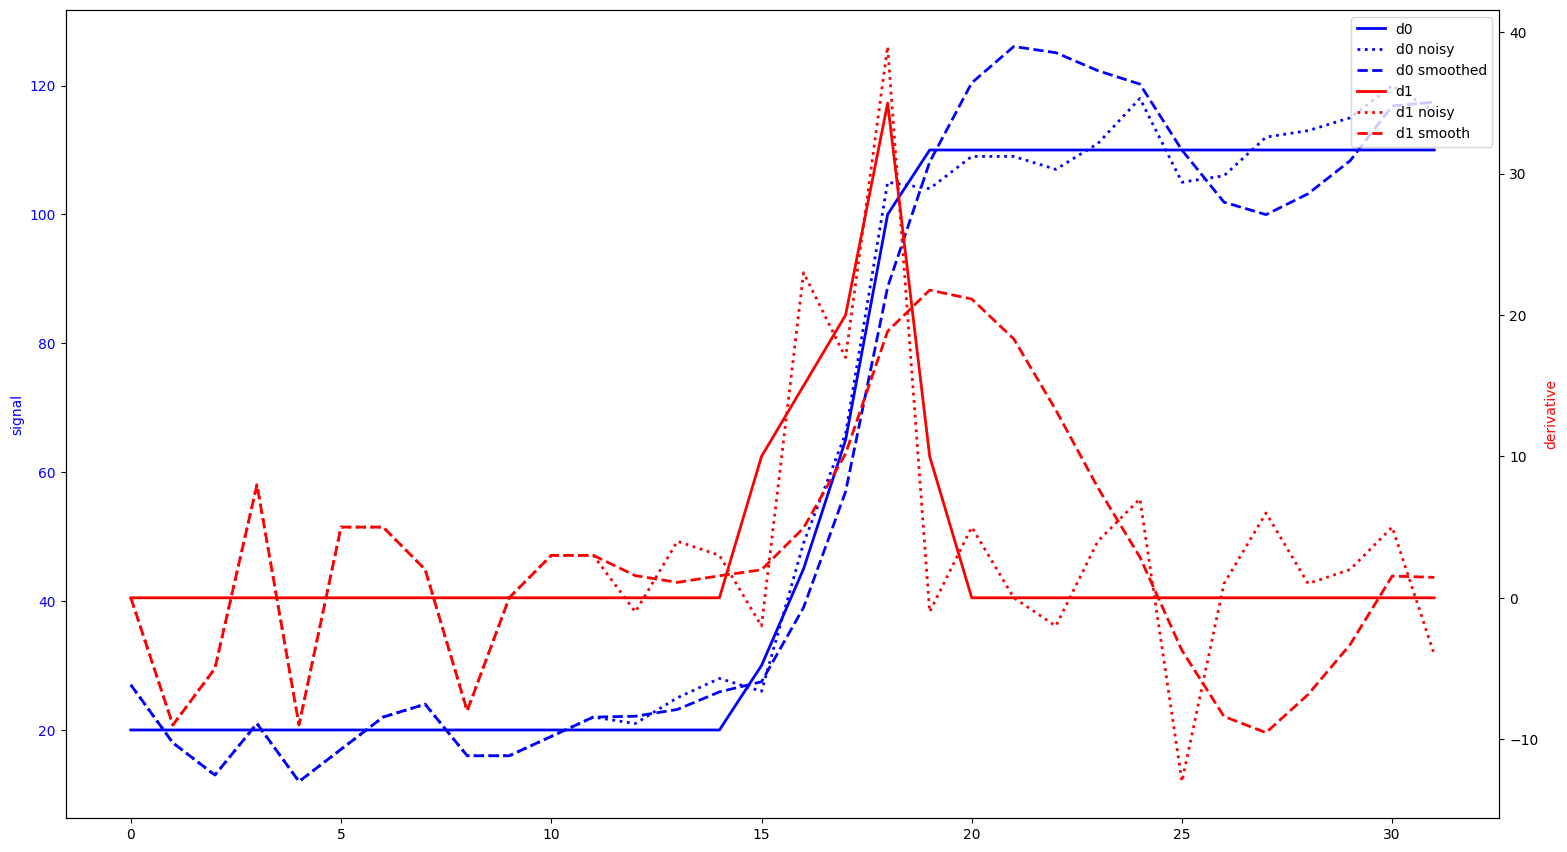

In [386]:
# x = np.linspace(0, 2 * np.pi, 100)
# y = np.sin(x) 
# y_noisy = y + np.random.random(100) * 0.2

y = np.array([20] * 15 + [30, 45, 65, 100, 110] + [110] * 12)
# y = np.array([20] * 15 + [23, 43, 63, 83, 103] + [110] * 12)
y_d1 = np.concatenate([[0], y[1:] - y[:-1]])
y_noisy = y + np.round(np.random.normal(0, 5, len(y)))
y_d1_noisy = np.concatenate([[0], y_noisy[1:] - y_noisy[:-1]])
x = [i for i in range(len(y))]

y_smooth = []
y_d1_smooth = []
for i in range(len(y_noisy)):
    if i < len(filter):
        y_smooth.append(y_noisy[i])
        y_d1_smooth.append(y_d1_noisy[i])
    else:
        y_smooth.append(np.dot(y_noisy[i-len(filter_d0)+1:i+1], filter_d0))
        y_d1_smooth.append(np.dot(y_noisy[i-len(filter_d1)+1:i+1], filter_d1))
        

# Sample data

# y_smooth = np.convolve(y, filter, mode='same')

# Create the plot
fig, ax1 = plt.subplots()
lw=2
# Plot the first line
ax1.plot(x, y, label='d0', color='blue', lw=lw)
ax1.plot(x, y_noisy, label='d0 noisy', color='blue',ls='dotted', lw=lw)
ax1.plot(x, y_smooth, label='d0 smoothed', color='blue', ls='--', lw=lw)
ax1.set_ylabel('signal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, y_d1, label='d1', color='red', lw=lw)
ax2.plot(x, y_d1_noisy, label='d1 noisy', color='red', ls='dotted', lw=lw)
ax2.plot(x, y_d1_smooth, label='d1 smooth', color='red', ls='--', lw=lw)
ax2.set_ylabel('derivative', color='red')
ax2.tick_params(axis='y')#, labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.set_size_inches(18.5, 10.5)
plt.show()

# # Plot the results
# plt.plot(x, y, label='Noisy signal')
# plt.plot(x, y_smooth, label='Smoothed signal', color='red')
# plt.legend()
# plt.show()

## Actual key data

In [2]:
# folder of key data to analyse
# all log files in the same folder are assumed to come from the same setup
# i.e. same electronics setup, same note etc.
# folder = r'./note logs/p to ff E'
folder = r'note logs/p to ff E 75us long cables'
files = os.listdir(folder)
files = [f for f in files if f.endswith('.txt')]
files = sorted(files)
file_lines = []
for file in files:
    # or open specific file
    # file = r'note logs\COM12_2025_02_08.20.03.58.575.txt'
    with open(os.path.join(folder, file), 'r') as f:
        lines = f.readlines()
        # trim whitespace
        lines = [line.strip() for line in lines]
    file_lines.append(lines)
lines[0]

'pitch:49,noteCount:232,noteOnHammerSpeed:0.002433,noteOnVelocity:11,rawADC:567,hammerPosition:565.932312,elapsedUs:81,iteration:26634467,'

In [ ]:
# only keep every nth line
keep = 3
# keys to keep
# keep all if empty
keys = [] #[49]
dfs = []
for filename, lines in zip(files, file_lines):
    strike = 0
    data = []
    # keep track of elapsed time, if we skip a line we need to add the elapsed time to the next line
    elapsed = 0
    last_pitch = 0
    for i in range(len(lines)):
            line = lines[i]
            # assumes a line looks like this:
            # key1:val1,key2:val2,...,keyN:valN,
            d = {s.split(':')[0]: s.split(':')[1] for s in line.split(',') if len(s) > 1}
            if d['pitch'] != last_pitch:
                elapsed = 0
                last_pitch = d['pitch']
            elapsed += int(d['elapsedUs'])
            if (i % keep == 0) and (len(keys) == 0 or int(d['pitch']) in keys):
                d['elapsedUs'] = elapsed
                data.append(d)
                elapsed = 0
            
        
    df = pd.DataFrame(data)
    # change all dtypes to numeric
    df = df.apply(pd.to_numeric, errors='ignore')
    # sort df by pitch, noteCount, and iteration
    # this shouldn't be necessary, but the line order is being scambled by the vscode serial extension
    # when writing serial output to file
    df = df.sort_values(['pitch', 'noteCount', 'iteration']).reset_index(drop=True)

    # some checks:
    # check each noteCount has the same number of rows
    if not df.groupby('noteCount').size().nunique() == 1:
        print(f'skipped file {filename}')
        # df = df.drop_duplicates('iteration')
        # continue
    # check df is unique on pitch, noteCount, and iteration
    # assert all(df.groupby(['pitch', 'noteCount', 'iteration']).size() == 1)
    # check that the iteration is always increasing by 1, i.e. we haven't missed any iterations
    # it is very unlikely the same row count check would pass, and this one fail
    it_diffs = df.groupby(['pitch', 'noteCount']).iteration.diff()
    # it_diffs = it_diffs.fillna(1)
    # assert all(it_diffs == 1)

    dfs.append(df)
df



skipped file COM12_2025_03_04.10.37.42.532.txt
skipped file COM12_2025_03_04.10.38.37.746.txt
skipped file COM12_2025_03_04.10.39.20.649.txt
skipped file COM12_2025_03_04.10.41.49.833.txt
skipped file COM12_2025_03_04.10.42.41.814.txt


,pitch,noteCount,noteOnHammerSpeed,noteOnVelocity,rawADC,hammerPosition,elapsedUs,iteration
0,49,232,0.002433,11,567,565.932312,81,26634467
1,49,232,0.002433,11,567,566.508789,243,26634470
2,49,232,0.002433,11,567,567.087708,243,26634473
3,49,232,0.002433,11,567,567.321655,243,26634476
4,49,232,0.002433,11,567,567.169617,243,26634479
...,...,...,...,...,...,...,...,...
1329,49,236,0.024398,113,750,914.291443,243,26693764
1330,49,236,0.024398,113,751,911.356445,243,26693767
1331,49,236,0.024398,113,752,907.784241,243,26693770
1332,49,236,0.024398,113,752,903.574829,243,26693773


In [6]:
# check for duplicate iterations
i = -1
display(dfs[i].drop_duplicates('iteration').groupby('noteCount').size())
display(dfs[i].groupby('noteCount').size())

noteCount
232    267
233    267
234    266
235    267
236    267
dtype: int64

noteCount
232    267
233    267
234    266
235    267
236    267
dtype: int64

In [7]:
# check if ADC should be inverted or not, and get adc min / max
# min is key in up position, max is key in down position
# inverted_notes = []
# for df in dfs:
#     for group, dfg in df.groupby('noteCount'):
#         raw_adc = dfg['rawADC'].values
#         # compare mean value of first half to second half
#         mean1 = np.mean(raw_adc[:len(raw_adc)//2])
#         mean2 = np.mean(raw_adc[len(raw_adc)//2:])    
#         inverted_notes.append(mean1 > mean2)
#     if all(inverted_notes):
#         df['ADC'] = -df['rawADC']
#         reverse = True

#     elif not any(inverted_notes):
#         df['ADC'] = df['rawADC']
#         reverse = False
#     else:
#         assert False, 'some notes are reverse and some are not'

reverse = False
for df in dfs:
    if reverse:
        df['ADC'] = -df['rawADC']
    else:
        df['ADC'] = df['rawADC']


# max is affected by compression of felt, so we could do something fancier, e.g. subtract a percentage of the range
# of course, that is dependent on the maximum velocity of the loudest note
min_adc_val = np.median([df.ADC.min() for df in dfs])
# max_adc_val = np.median([df.ADC.max() for df in dfs])
max_adc_val = np.min([dfg.ADC.max() for df in dfs for noteCount, dfg in df.groupby('noteCount')])
# max_adc_val = 630
# max_adc_val = max_adc_val - 0.15 * (max_adc_val - min_adc_val)
print(min_adc_val, max_adc_val)

503.0 628


In [113]:
# set up parameters
hammer_travel = 7 # mm

note_on_threshold = int((max_adc_val - min_adc_val) * .01 + max_adc_val)
# threshold for when key should trigger a note off
note_off_threshold = int((max_adc_val - min_adc_val) * 0.3 + min_adc_val)
# threshold for when key/hammer should be armed again
key_reset_threshold = int((max_adc_val - min_adc_val) * 0.75 + min_adc_val)

print('note on threshold:', note_on_threshold)

def mm2adc_bits(mm):
    return mm / hammer_travel * (max_adc_val - min_adc_val)

def adc_bits2mm(adc_bits):
    if adc_bits is None:
        return None
    return adc_bits / (max_adc_val - min_adc_val) * hammer_travel

def adc_bits2m(adc_bits):
    if adc_bits is None:
        return None
    return adc_bits2mm(adc_bits) / 1000

def per_us2per_s(per_us):
    if per_us is None:
        return None
    return 1e6*per_us

gravity_scale_factor = 0.1
gravity_m = 9.81e-12 * gravity_scale_factor # metres per microsecond^2
gravity_mm = gravity_m * 1000 # mm per microsecond^2
gravity = mm2adc_bits(gravity_mm) # ADC bits per microsecond^2

# mm of key travel per second to be considered a strike
key_strike_min_speed_mm_sec = 3
key_strike_min_speed_mm_US = key_strike_min_speed_mm_sec / 1e6 # mm per microsecond
key_strike_min_speed = mm2adc_bits(key_strike_min_speed_mm_US) # ADC bits per microsecond

# mm of key travel per second for velocity of 0
# 0 is fine, even though I had it higher originally
v_min_speed_mm_sec = 50 # 3e3
v_min_speed_mm_US = v_min_speed_mm_sec / 1e6 # mm per microsecond
v_min_speed = mm2adc_bits(v_min_speed_mm_US) # ADC bits per microsecond

# mm of key travel per second for velocity of 127
v_max_speed_mm_sec = 1.2e3
v_max_speed_mm_US = v_max_speed_mm_sec / 1e6 # mm per microsecond
v_max_speed = mm2adc_bits(v_max_speed_mm_US) # ADC bits per microsecond

min_log_speed = np.log(v_min_speed)
max_log_speed = np.log(v_max_speed)

def speed2velocity(speed):
    log_speed = np.log(speed)
    # velocity on [0, 1] scale
    intensity = (log_speed - min_log_speed) / (max_log_speed - min_log_speed)
    intensity = np.clip(intensity, 0, 1)
    return intensity * 127

def apply_filter(vals, filter):
    """filter, duplicating the first value to keep the same length"""
    # filtered = np.convolve(vals, filter, mode='valid')
    filtered = np.convolve(np.concatenate([vals[:len(filter)-1], vals]), filter, mode='valid')
    return filtered

note on threshold: 629


In [114]:
window_len = 18
f = signal.savgol_coeffs(
        window_length=window_len,
        polyorder=1,
        deriv=1,
        pos=window_len-1,
        use='dot'
)
f

array([-0.01754386, -0.01547988, -0.01341589, -0.01135191, -0.00928793,
       -0.00722394, -0.00515996, -0.00309598, -0.00103199,  0.00103199,
        0.00309598,  0.00515996,  0.00722394,  0.00928793,  0.01135191,
        0.01341589,  0.01547988,  0.01754386])

c:\Users\Andrew\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


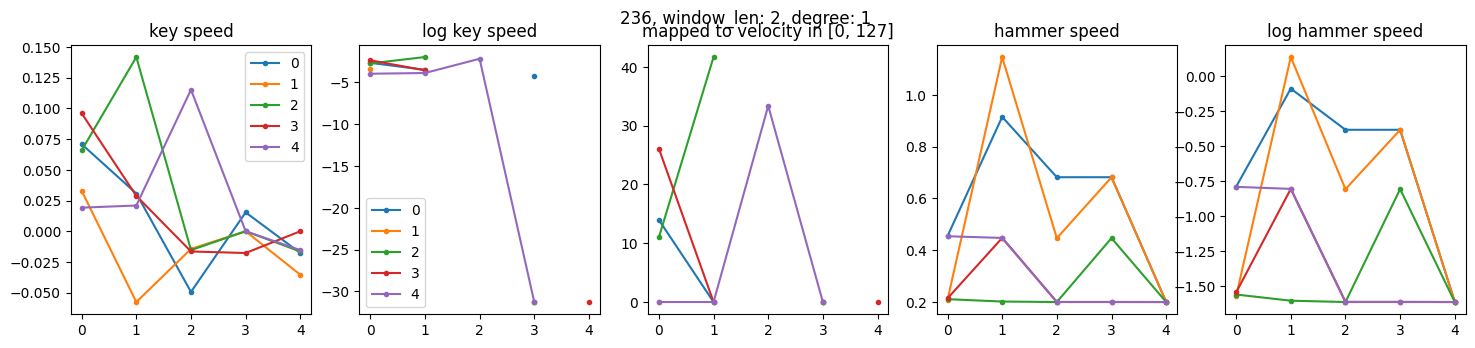

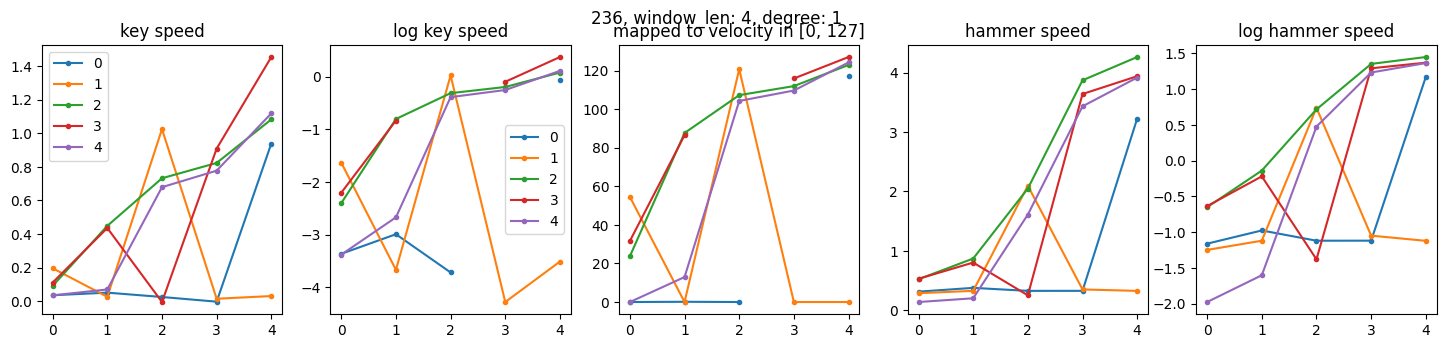

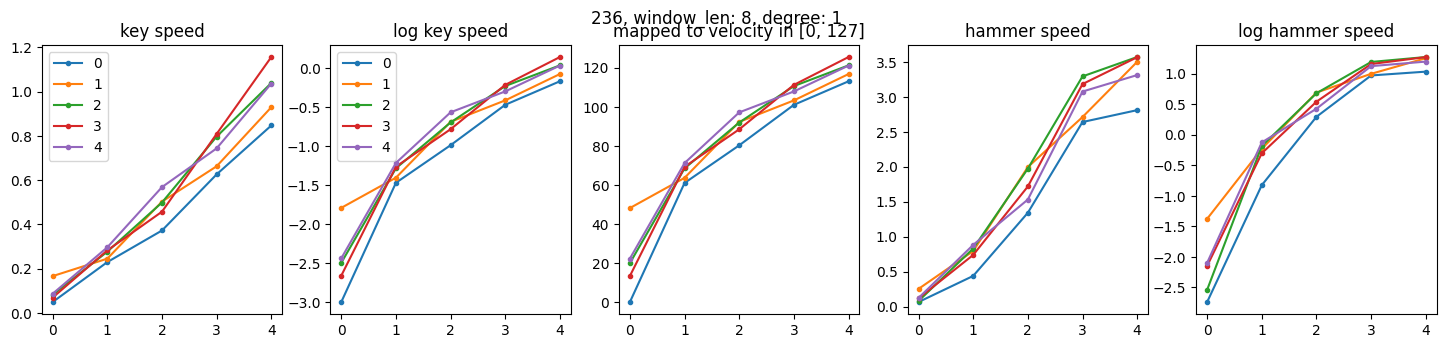

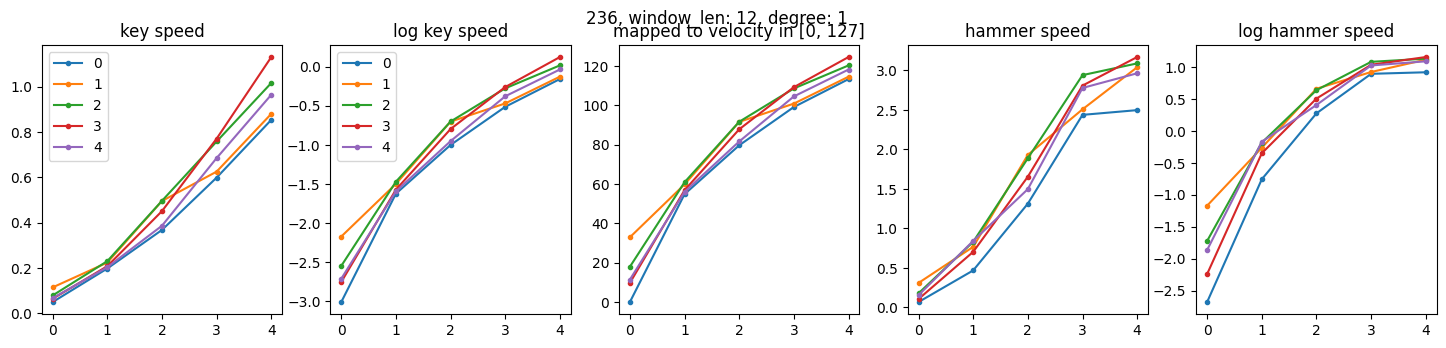

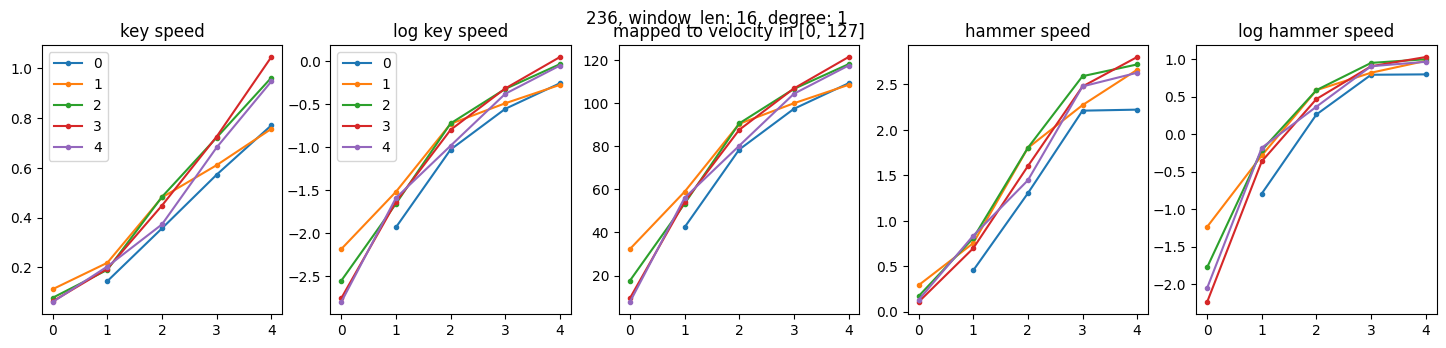

In [115]:
key_pos_filter = np.array([1,1,1,1], dtype=float)
# key_speed_filter = np.array([1, -1], dtype=float)
# standardize
key_pos_filter /= np.sum(key_pos_filter)
# key_speed_filter /= np.sum(key_speed_filter)

def get_speed_filter(n, degree, use='conv'):
    window_len = n
    polyorder=degree
    use='conv' # 'dot' or 'conv'
    return signal.savgol_coeffs(
        window_length=window_len,
        polyorder=polyorder,
        deriv=1,
        pos=window_len-1,
        use=use
    )

def get_pos_filter(n, degree):
    window_len = n
    polyorder=degree
    use='conv' # 'dot' or 'conv'
    return signal.savgol_coeffs(
        window_length=window_len,
        polyorder=polyorder,
        deriv=0,
        pos=window_len-1,
        use=use
)
# this works quite well
for degree in (1,):
    for window_len in (2, 4, 8,12, 16):#(12, 24, 36, 48, 60):
        if degree >= window_len:
            continue
        key_pos_filter = get_pos_filter(window_len, degree)
        key_speed_filter = get_speed_filter(window_len, degree)

        # for each set of notes, store a df with one row per note 
        strike_dfs = []

        sim_dfs = []

        for df_i, df in enumerate(dfs):
            # plot colours, one colour for each noteCount
            colors = plt.cm.viridis(np.linspace(0, 1, len(df.noteCount.unique())))
            note_ons = []
            sim_lines = []

            for n, (noteCount, dfg) in enumerate(df.groupby('noteCount')):

                # if n > 2:
                    # break
            # dfg = df[df.noteCount == df.noteCount.min()]

                # initializing strike index here and resetting to current index every time
                # the key stops moving down and the hammer is in contact with the key doesn't work
                #  I can't remember why that is, now!
                # 
                mean_key_strike_speed = None

                adc_vals = dfg.ADC.values
                elapsedUS_vals = dfg.elapsedUs.values

                key_pos_vals = apply_filter(adc_vals, key_pos_filter)
                key_speed_vals = apply_filter(adc_vals, key_speed_filter)
                key_speed_naive_vals = apply_filter(adc_vals, [1, -1])
                key_speed_vals = [v / e for v, e in zip(key_speed_vals, elapsedUS_vals)]
                key_speed_naive_vals = [v / e for v, e in zip(key_speed_naive_vals, elapsedUS_vals)]
                hammer_pos = key_pos_vals[0]
                hammer_speed = 0

                hammer_pos_vals = []
                hammer_speed_vals = []

                note_on_idx = None
                note_on_hammer_speed = None
                note_on_vel = None
                strike_start = None
                strike_end = None

                for i in range(0, len(key_pos_vals)):
                    key_pos = key_pos_vals[i]
                    key_speed = key_speed_vals[i]
                    elapsedUS = elapsedUS_vals[i]

                    original_hammer_speed = hammer_speed
                    
                    hammer_speed -= gravity * elapsedUS

                    hammer_pos += (hammer_speed + original_hammer_speed) * elapsedUS / 2

                    if hammer_pos < key_pos:
                        hammer_pos = key_pos
                        if hammer_speed < key_speed:
                            hammer_speed = key_speed
                    
                    hammer_pos_vals.append(hammer_pos)
                    hammer_speed_vals.append(hammer_speed)

                    if (hammer_pos > note_on_threshold) and (note_on_idx is None) and ((key_speed < v_min_speed) or (i == (len(key_pos_vals)-1))):
                        # velocity = _get_hammer_midi_velocity()
                        note_on_idx = i
                        note_on_hammer_speed = hammer_speed
                        # hammer_pos = key_reset_threshold
                        hammer_speed = -hammer_speed

                        strike_start = i
                        positive_speed_time = 0
                        while np.sum(elapsedUS_vals[strike_start:i+1]) < 2000 or key_speed_vals[strike_start] > key_strike_min_speed or positive_speed_time < 2000:
                            if strike_start < 0:
                                break
                            strike_start -= 1
                            if key_speed_vals[strike_start] > 0:
                                positive_speed_time += elapsedUS_vals[strike_start]
                        strike_end = i
                        mean_key_strike_speed = np.mean(key_speed_vals[strike_start:i+1])

                        # if noteCount == 139:
                            # print(strike_start, strike_end, i)
                        
                        # if df_i == 2:
                        # plt.plot(key_pos_vals)
                        # plt.axvline(strike_start)
                        # plt.axvline(i+1)
                        # plt.show()
                    sim_lines.append({
                        'noteCount': noteCount,
                        'ADC': adc_vals[i],
                        'key_pos': key_pos_vals[i],
                        'key_speed': key_speed_vals[i],
                        'key_speed_naive': key_speed_naive_vals[i],
                        'hammer_pos': hammer_pos,
                        'hammer_speed': hammer_speed,
                        'elapsedUS': elapsedUS
                        })

                note_ons.append({
                    'note_count': noteCount,
                    'mean_key_strike_speed': mean_key_strike_speed,
                    'mean_key_strike_speed_m_s': per_us2per_s(adc_bits2m(mean_key_strike_speed)),
                    'hammer_speed': note_on_hammer_speed,
                    'hammer_speed_m_s': per_us2per_s(adc_bits2m(note_on_hammer_speed)),
                    'calc_velocity': note_on_vel,
                    'strike_start': strike_start,
                    'strike_end': strike_end,
                    'orig_velocity': dfg.noteOnVelocity.values[0],
                    'min_adc_val': min(adc_vals),
                    'max_adc_val': max(adc_vals)
                    })
                # if noteCount == 139:
                    # print(note_ons[-1])
                
                
                # plt.plot(key_pos_vals, color=colors[n])
                # plt.plot(hammer_pos_vals, color=colors[n], ls='--')
                # plt.axhline(note_on_threshold, color='r')

                # plt.plot(key_speed_vals, color=colors[n])
                # plt.plot(hammer_speed_vals, color=colors[n], ls='--')
                # create horizontal line at note on threshold
            strikes = pd.DataFrame(note_ons)
            strike_dfs.append(strikes)
            sim_dfs.append(pd.DataFrame(sim_lines))
            
            # plt.show()

        fig, axs = plt.subplots(1,5)
        # make figure a bit wider
        fig.set_size_inches(18, 3.5)
        fig.suptitle(f'{noteCount}, window_len: {window_len}, degree: {degree}')
        print()
        for i, strikes in enumerate(strike_dfs):
            axs[0].plot(strikes.mean_key_strike_speed_m_s, label=i, marker='.')
            axs[0].legend()
        # set axs title
        axs[0].set_title(f'key speed')
        # plt.show()

        for i, strikes in enumerate(strike_dfs):
            axs[1].plot(np.log(strikes.mean_key_strike_speed_m_s), label=i, marker='.')
            axs[1].legend()
        # set axs title
        axs[1].set_title(f'log key speed')
        # plt.show()

        for i, strikes in enumerate(strike_dfs):
            axs[2].plot(speed2velocity(strikes.mean_key_strike_speed), label=i, marker='.')
            # plt.legend()
        axs[2].set_title('mapped to velocity in [0, 127]')
        # plt.show()

        # original velocities looked like this
        for i, strikes in enumerate(strike_dfs):
            axs[3].plot(strikes.hammer_speed_m_s, label=i, marker='.')
        # plt.legend()
        axs[3].set_title('hammer speed')

        # original velocities looked like this
        for i, strikes in enumerate(strike_dfs):
            axs[4].plot(np.log(strikes.hammer_speed_m_s), label=i, marker='.')
        # plt.legend()
        axs[4].set_title('log hammer speed')
        plt.show()

In [81]:
strikes

,note_count,mean_key_strike_speed,mean_key_strike_speed_m_s,hammer_speed,hammer_speed_m_s,calc_velocity,strike_start,strike_end,orig_velocity,min_adc_val,max_adc_val
0,232,0.001083,0.000061,0.002297,0.000129,None,11,266,11,566,640
1,233,0.003610,0.000202,0.014914,0.000835,None,63,262,43,513,693
2,234,0.006656,0.000373,0.025802,0.001445,None,125,256,68,505,724
3,235,0.012175,0.000682,0.044244,0.002478,None,171,250,103,503,747
4,236,0.016629,0.000931,0.046922,0.002628,None,192,251,113,505,752


267


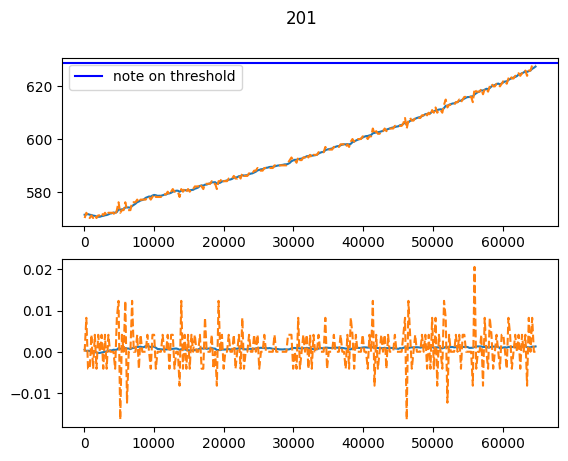

267


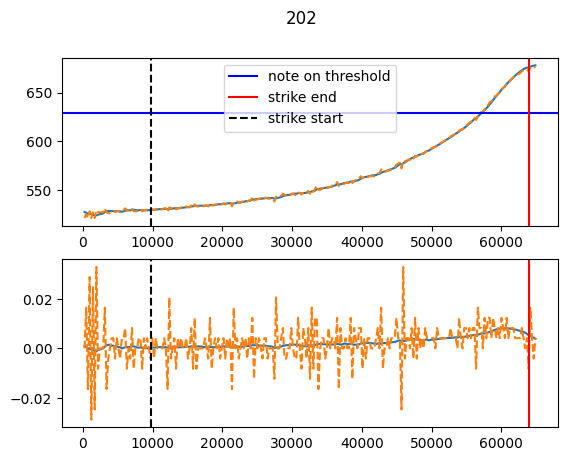

266


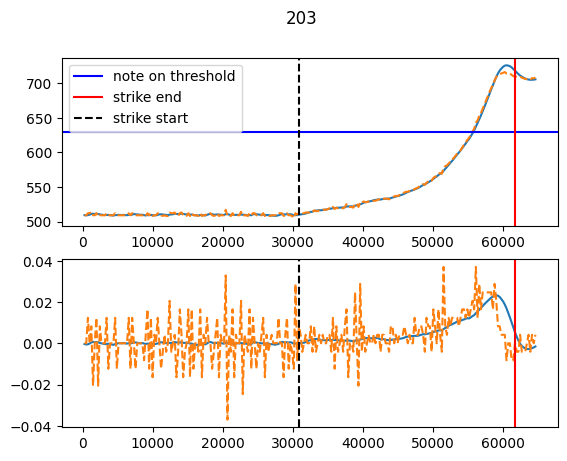

267


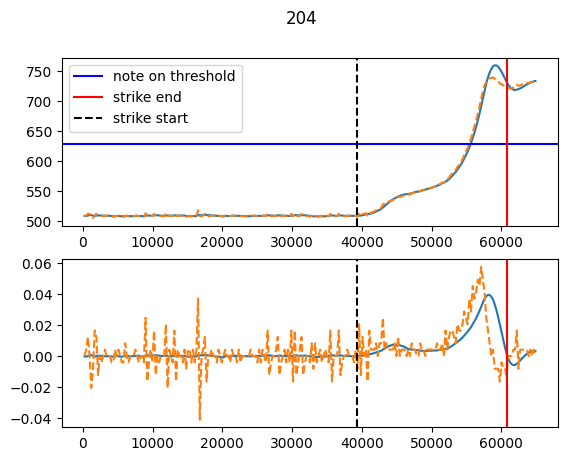

267


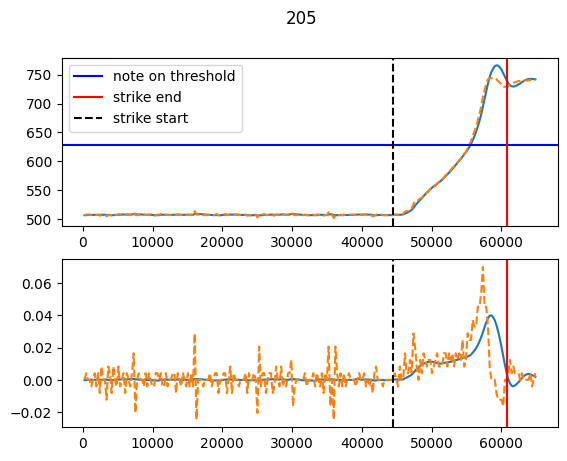

267


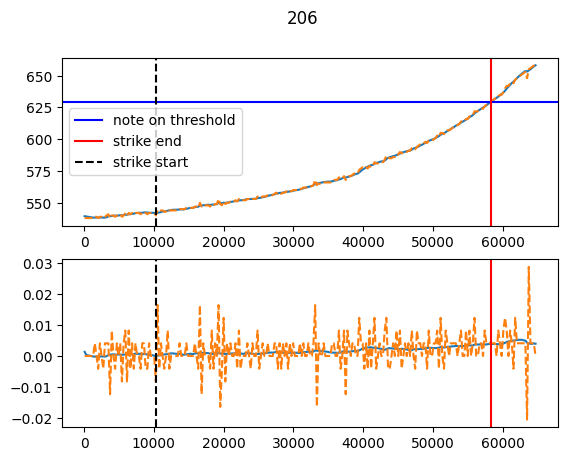

267


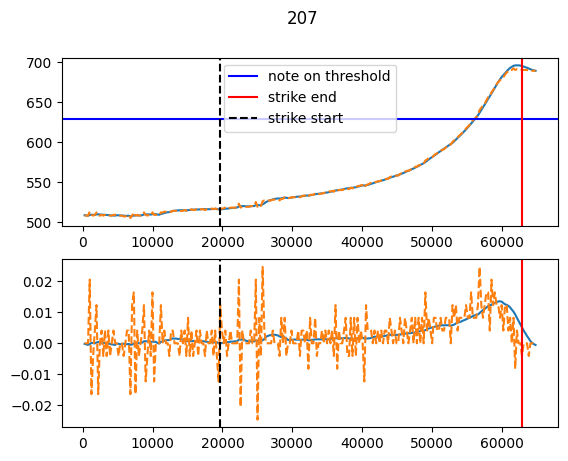

266


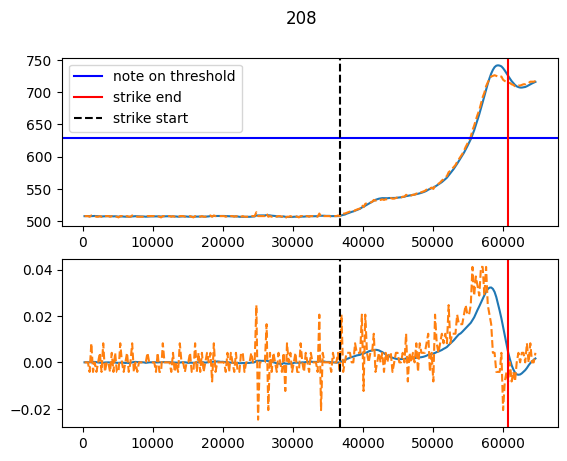

267


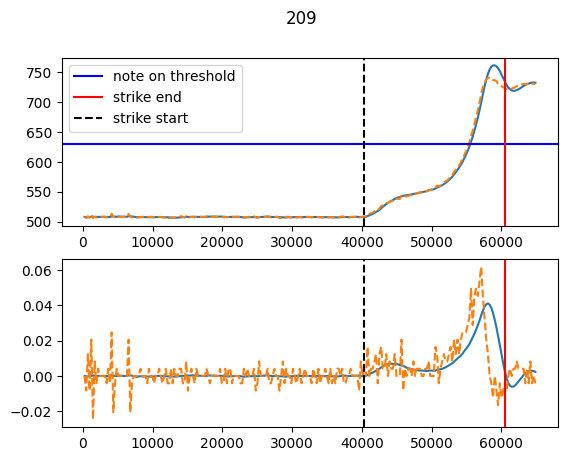

267


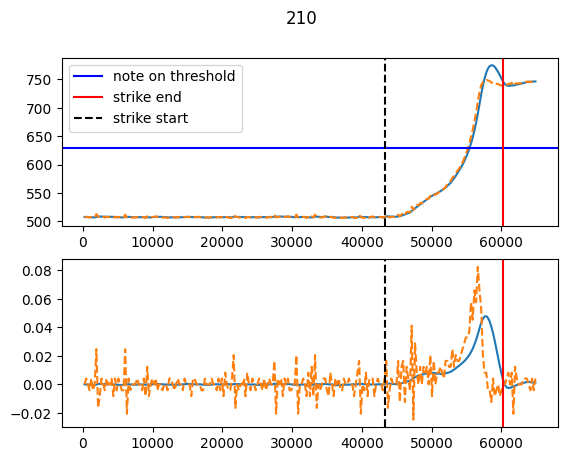

267


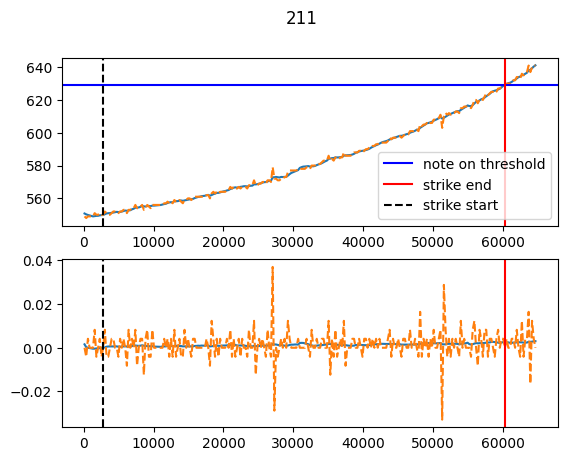

267


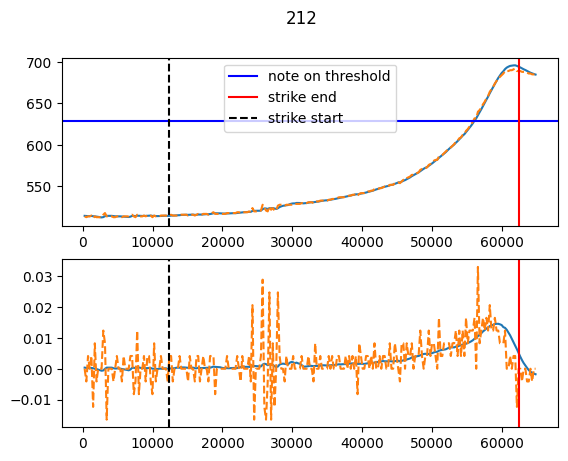

266


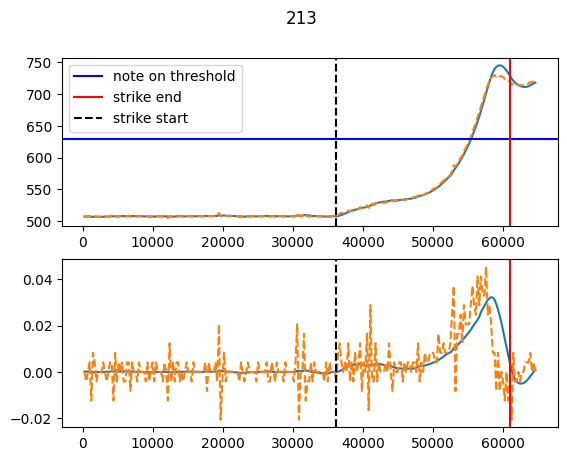

267


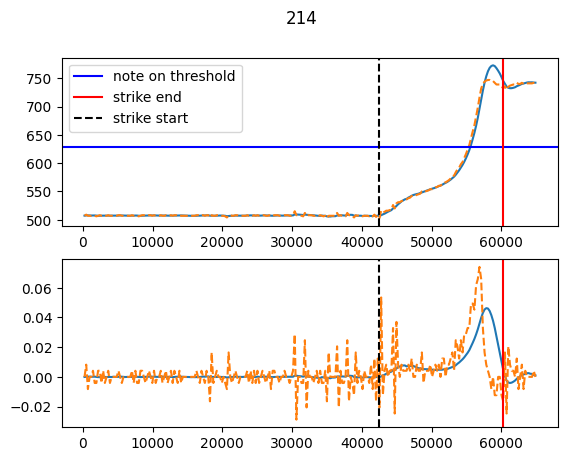

267


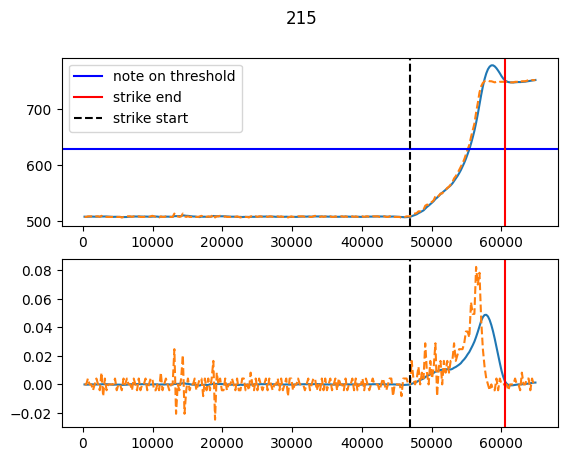

267


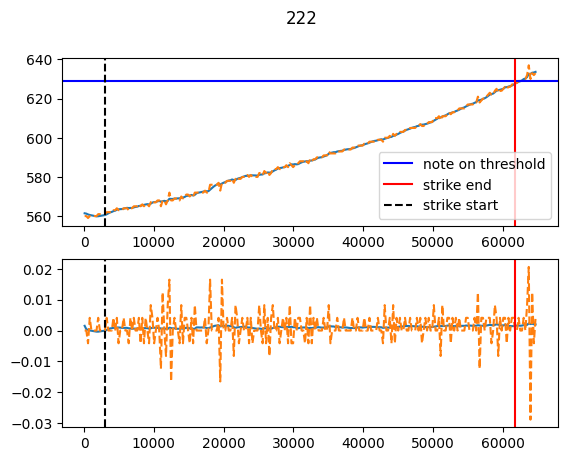

267


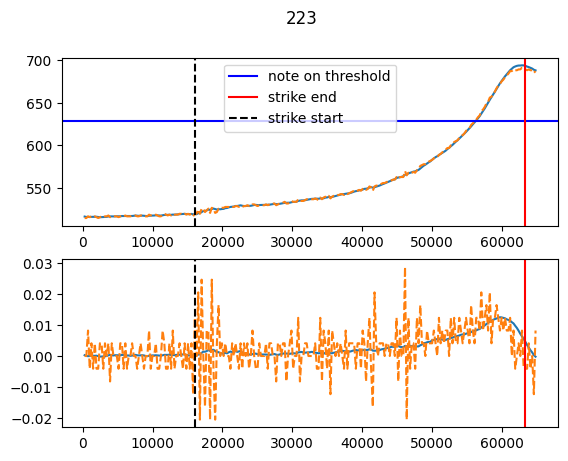

266


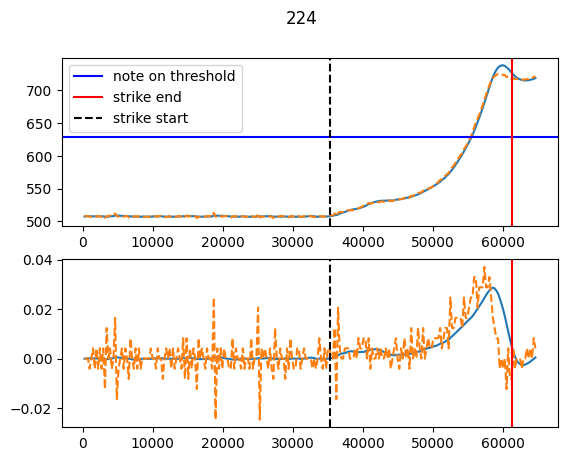

267


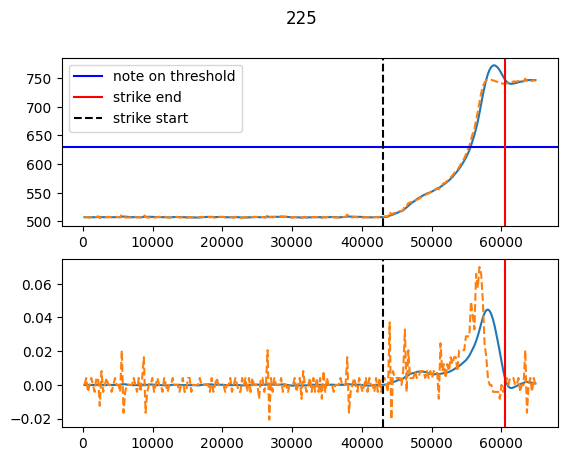

267


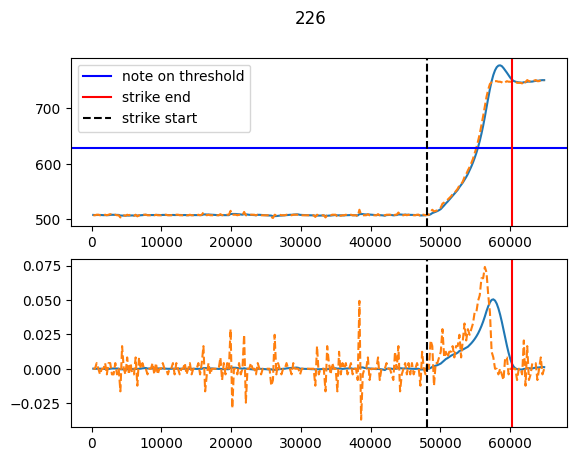

267


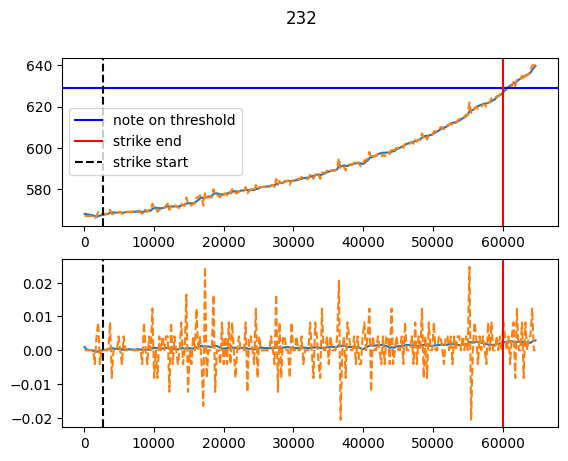

267


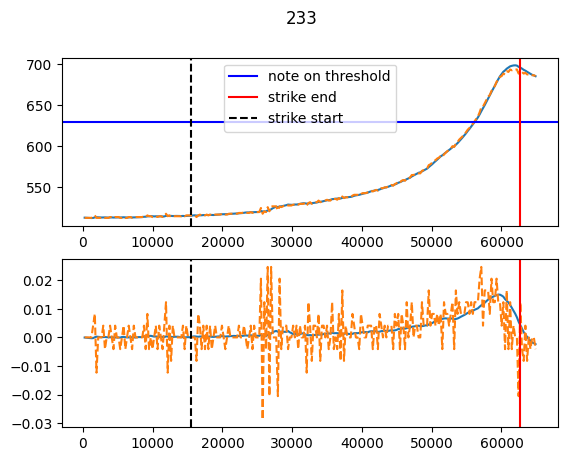

266


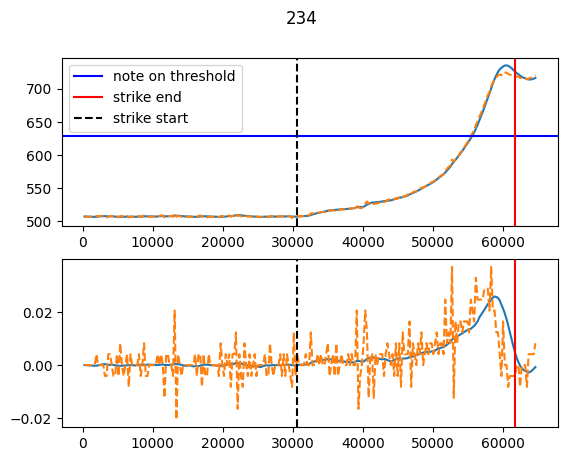

267


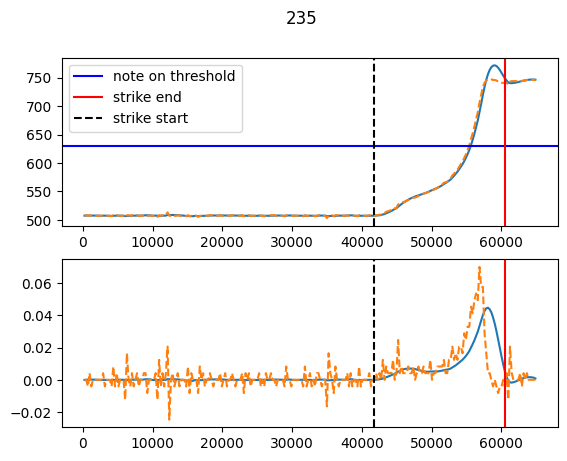

267


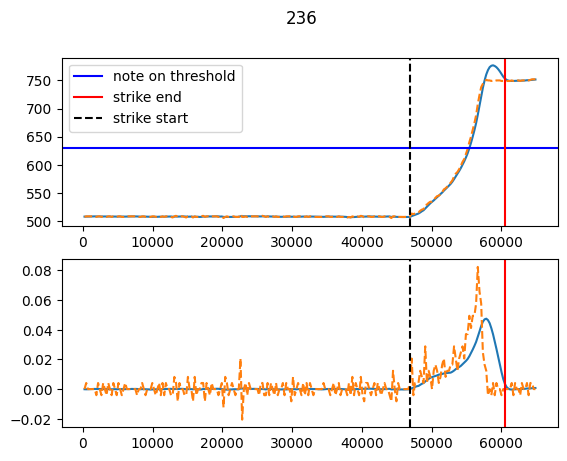

In [44]:
for strike_df, sim_df in zip(strike_dfs, sim_dfs):
# n = 0
# strike_df, sim_df = strike_dfs[n], sim_dfs[n]
    n_notes = len(strike_df)
    for i, (noteCount, dfg) in enumerate(sim_df.groupby('noteCount')):
        print(len(dfg))
        elapsed_cumsum = dfg.elapsedUS.cumsum().values
        x = elapsed_cumsum
        # two panel plot for key pos and key speed
        fig, axs = plt.subplots(2)
        fig.suptitle(noteCount)
        axs[0].plot(x, dfg.key_pos.reset_index(drop=True))#, np.arange(len(dfg)))
        axs[0].plot(x, dfg.ADC.reset_index(drop=True), ls='--')#, np.arange(len(dfg)), ls='--')
        axs[0].axhline(note_on_threshold, color='b', label='note on threshold')
        if not np.isnan(strike_df.strike_end.values[i]):
            axs[0].axvline(x[int(strike_df.strike_end.values[i])], color='r', label='strike end')
        if not np.isnan(strike_df.strike_start.values[i]):
            axs[0].axvline(x[int(strike_df.strike_start[i])], color='black', ls='--', label='strike start')
        axs[0].legend()

        axs[1].plot(x, dfg.key_speed.reset_index(drop=True))
        axs[1].plot(x, dfg.key_speed_naive.reset_index(drop=True), ls='--')
        if not np.isnan(strike_df.strike_end.values[i]):
            axs[1].axvline(x[int(strike_df.strike_end.values[i])], color='r')
        if not np.isnan(strike_df.strike_start.values[i]):
            axs[1].axvline(x[int(strike_df.strike_start[i])], color='black', ls='--')
        plt.show()
        